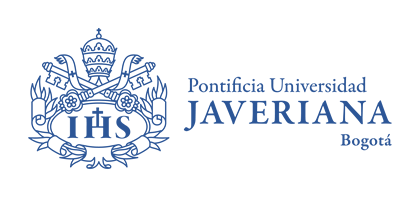

# Introducción a la IA - Proyecto

## Integrantes
- Andrés García Montoya
- Nicolás David Rincón Ballesteros
- Iván Darío Orozco

In [1]:
#!pip install -r requirements.txt

# Importar librerías

In [5]:
import pandas as pd                                                # Para manipulación de datos, CSV I/O (e.g. pd.read_csv).
import tensorflow as tf                                             # Para construir y entrenar modelos de aprendizaje profundo.
import matplotlib.pyplot as plt                                    # Para visualización de datos.
import seaborn as sns                                              # Para visualización de datos.
from sklearn.preprocessing import StandardScaler                   # Para normalizar los datos.
from sklearn.model_selection import train_test_split               # Para dividir los datos en conjuntos de entrenamiento y pruebas.

# Paso 1: Cargar el dataset

In [153]:
# Se cargan los datos del dataset de vinos desde un archivo CSV.
df_wine = pd.read_csv('winequality.csv')
df_wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


# **Paso 2: Comprensión del dataset**

In [6]:
# Información general del dataset
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [7]:
# Estadísticas descriptivas del dataset
df_wine.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


## Resumen

Wine Quality Dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 6497

    :Number of Attributes: 13 (12 numeric features and 1 target)

    :Attribute Information:
        - fixed_acidity
        - volatile_acidity
        - citric_acid
        - residual_sugar
        - chlorides
        - free_sulfur_dioxide
        - total_sulfur_dioxide
        - density
        - pH
        - sulphates
        - alcohol
        - quality (score between 0 and 10)
        - color (red or white)

    :Summary Statistics:

    ===================================== ======
                                           Min    Max
    ===================================== ====== ======
    fixed_acidity                          3.8    14.2
    volatile_acidity                       0.08   1.58
    citric_acid                            0.0    1.0
    residual_sugar                         0.6    65.8
    chlorides                              0.012  0.611
    free_sulfur_dioxide                    1.0    289.0
    total_sulfur_dioxide                   6.0    440.0
    density                                0.9901 1.0037
    pH                                     2.72   4.01
    sulphates                              0.22   2.0
    alcohol                                8.4    14.9
    quality                                3      9
    ===================================== ====== ======

    :Missing Attribute Values: None

    :Class Distribution:
        - Quality 0 to 6: 63 instances
        - Quality 6 to 9: 1319 instances

    :Creator: Paulo Cortez, University of Minho, Guimarães, Portugal, http://www3.dsi.uminho.pt/pcortez
    :Donor: Paulo Cortez (pcortez@ics.uminho.pt), Antonio Cerdeira, Fernando Almeida, Telmo Matos and José Reis (see also http://www3.dsi.uminho.pt/pcortez)

    :Date: March, 2009

This dataset is also available from the UCI machine learning repository, https://archive.ics.uci.edu/ml/datasets/Wine+Quality

.. topic:: References

   - P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.
   - S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014.

## Análisis Gráfico

## Imprimimos las frecuencias de la variable objetivo

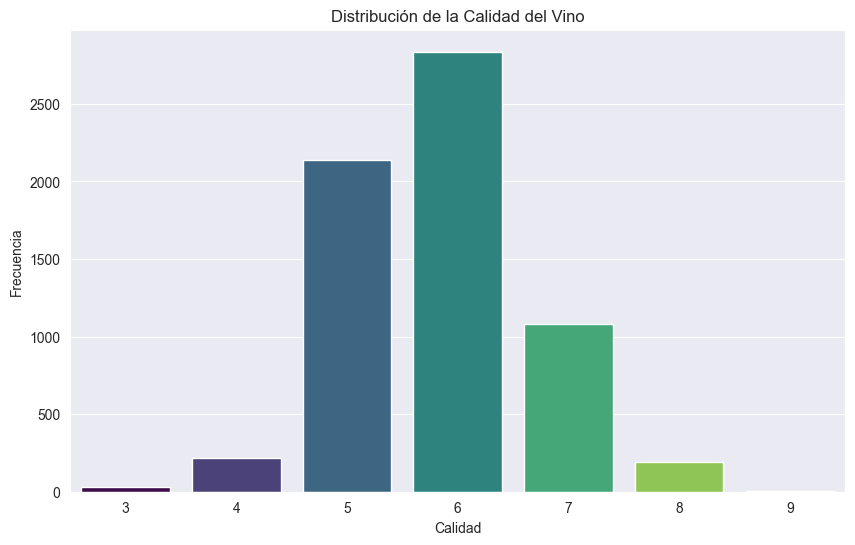

In [8]:
plt.figure(figsize=(10, 6))
sns.countplot(x='quality', data=df_wine, hue='quality', palette='viridis', dodge=False, legend=False)
plt.title('Distribución de la Calidad del Vino')
plt.xlabel('Calidad')
plt.ylabel('Frecuencia')
plt.show()

## Imprimimos las distribuciones de las variables

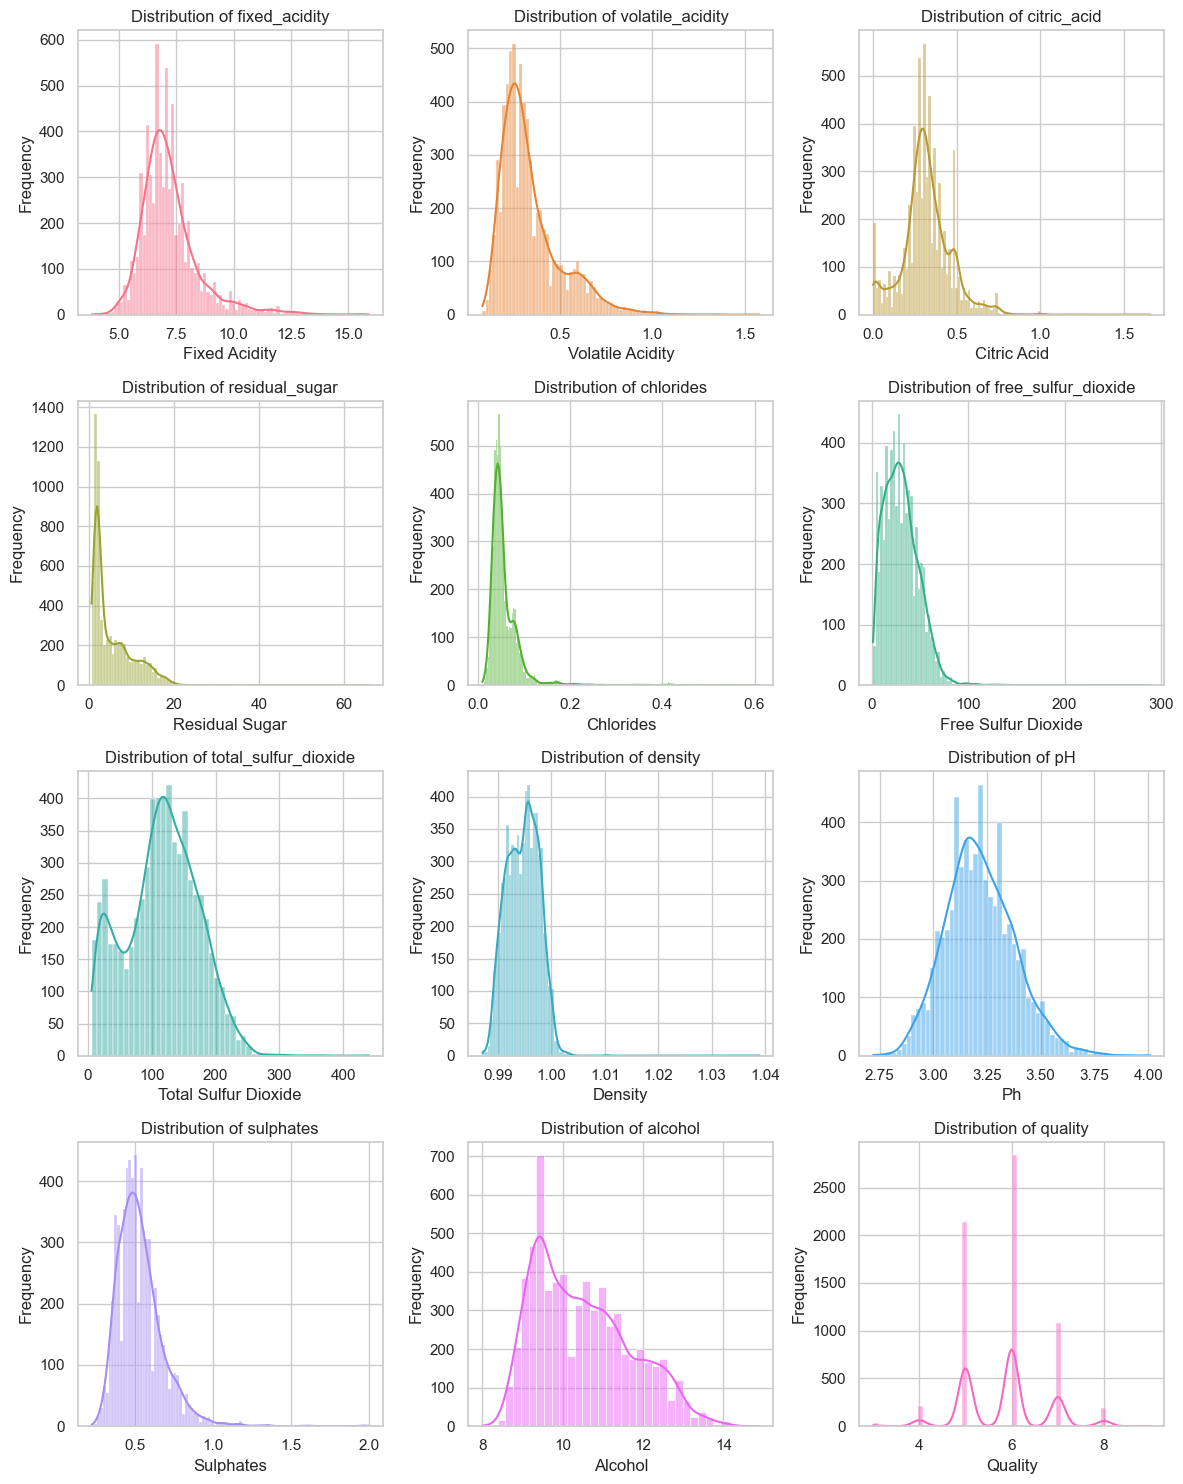

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configuración de visualización
sns.set(style="whitegrid")

# Variables seleccionadas
variables = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 
             'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']

# Definir paleta de colores
palette = sns.color_palette("husl", len(variables))

# Histogramas para variables seleccionadas
fig, axs = plt.subplots(4, 3, figsize=(12, 15))

for i, var in enumerate(variables):
    row = i // 3
    col = i % 3
    sns.histplot(df_wine[var], kde=True, ax=axs[row, col], color=palette[i])
    axs[row, col].set_title(f'Distribution of {var}')
    axs[row, col].set_xlabel(var.replace('_', ' ').title())
    axs[row, col].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

## Imprimimos la matriz de correlación de las variables

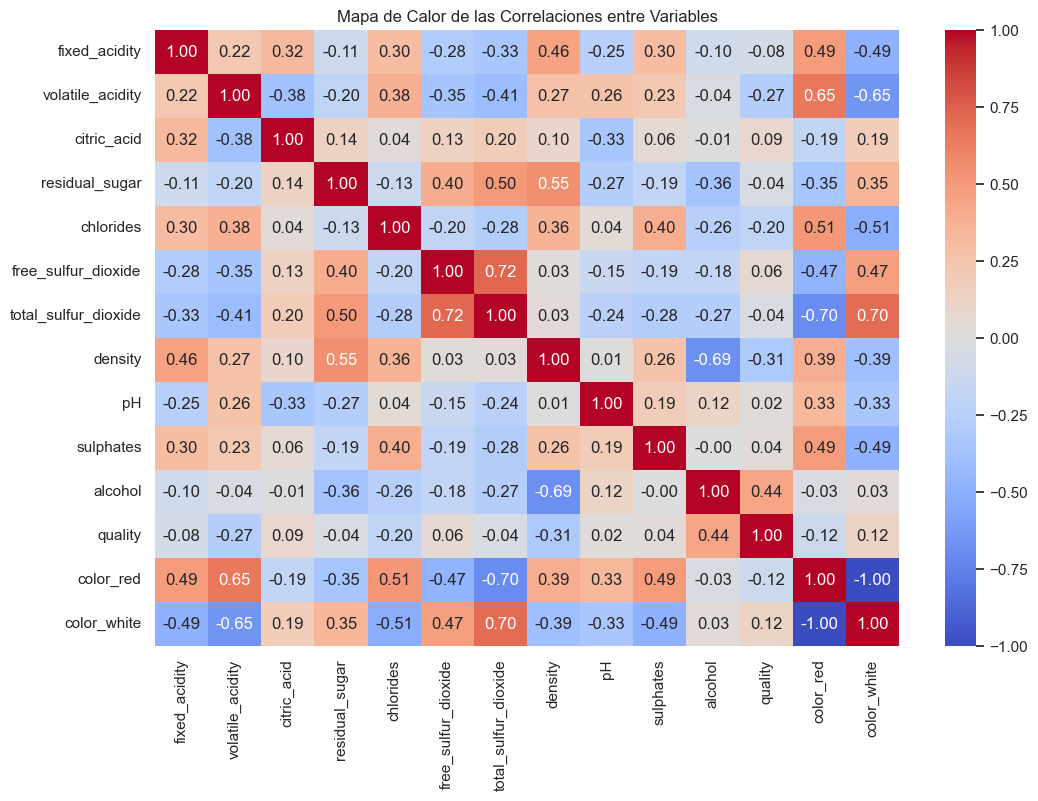

In [13]:
df_dummed = pd.get_dummies(df_wine, columns=['color'])
correlation_matrix = df_dummed.corr()

# Graficar el mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de Calor de las Correlaciones entre Variables')
plt.show()

# **Paso 3: pre procesamiento**

### Dumificación de variables categóricas

In [29]:
df_wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [154]:
# Dumificación de la variable categórica 'color'
df_wine = pd.get_dummies(df_wine, columns=['color'])
df_wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color_red,color_white
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,True,False
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,True,False
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,True,False
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,True,False
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,True,False


### Tratamiento de valores nulos

In [46]:
# Verificar la existencia de valores nulos (no hay)
print(df_wine.isnull().sum())

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
color_red               0
color_white             0
dtype: int64


No hay valores nulos en el dataset, por lo que no es necesario realizar el proceso de eliminación de valores nulos.

### Tratamiento de valores atípicos

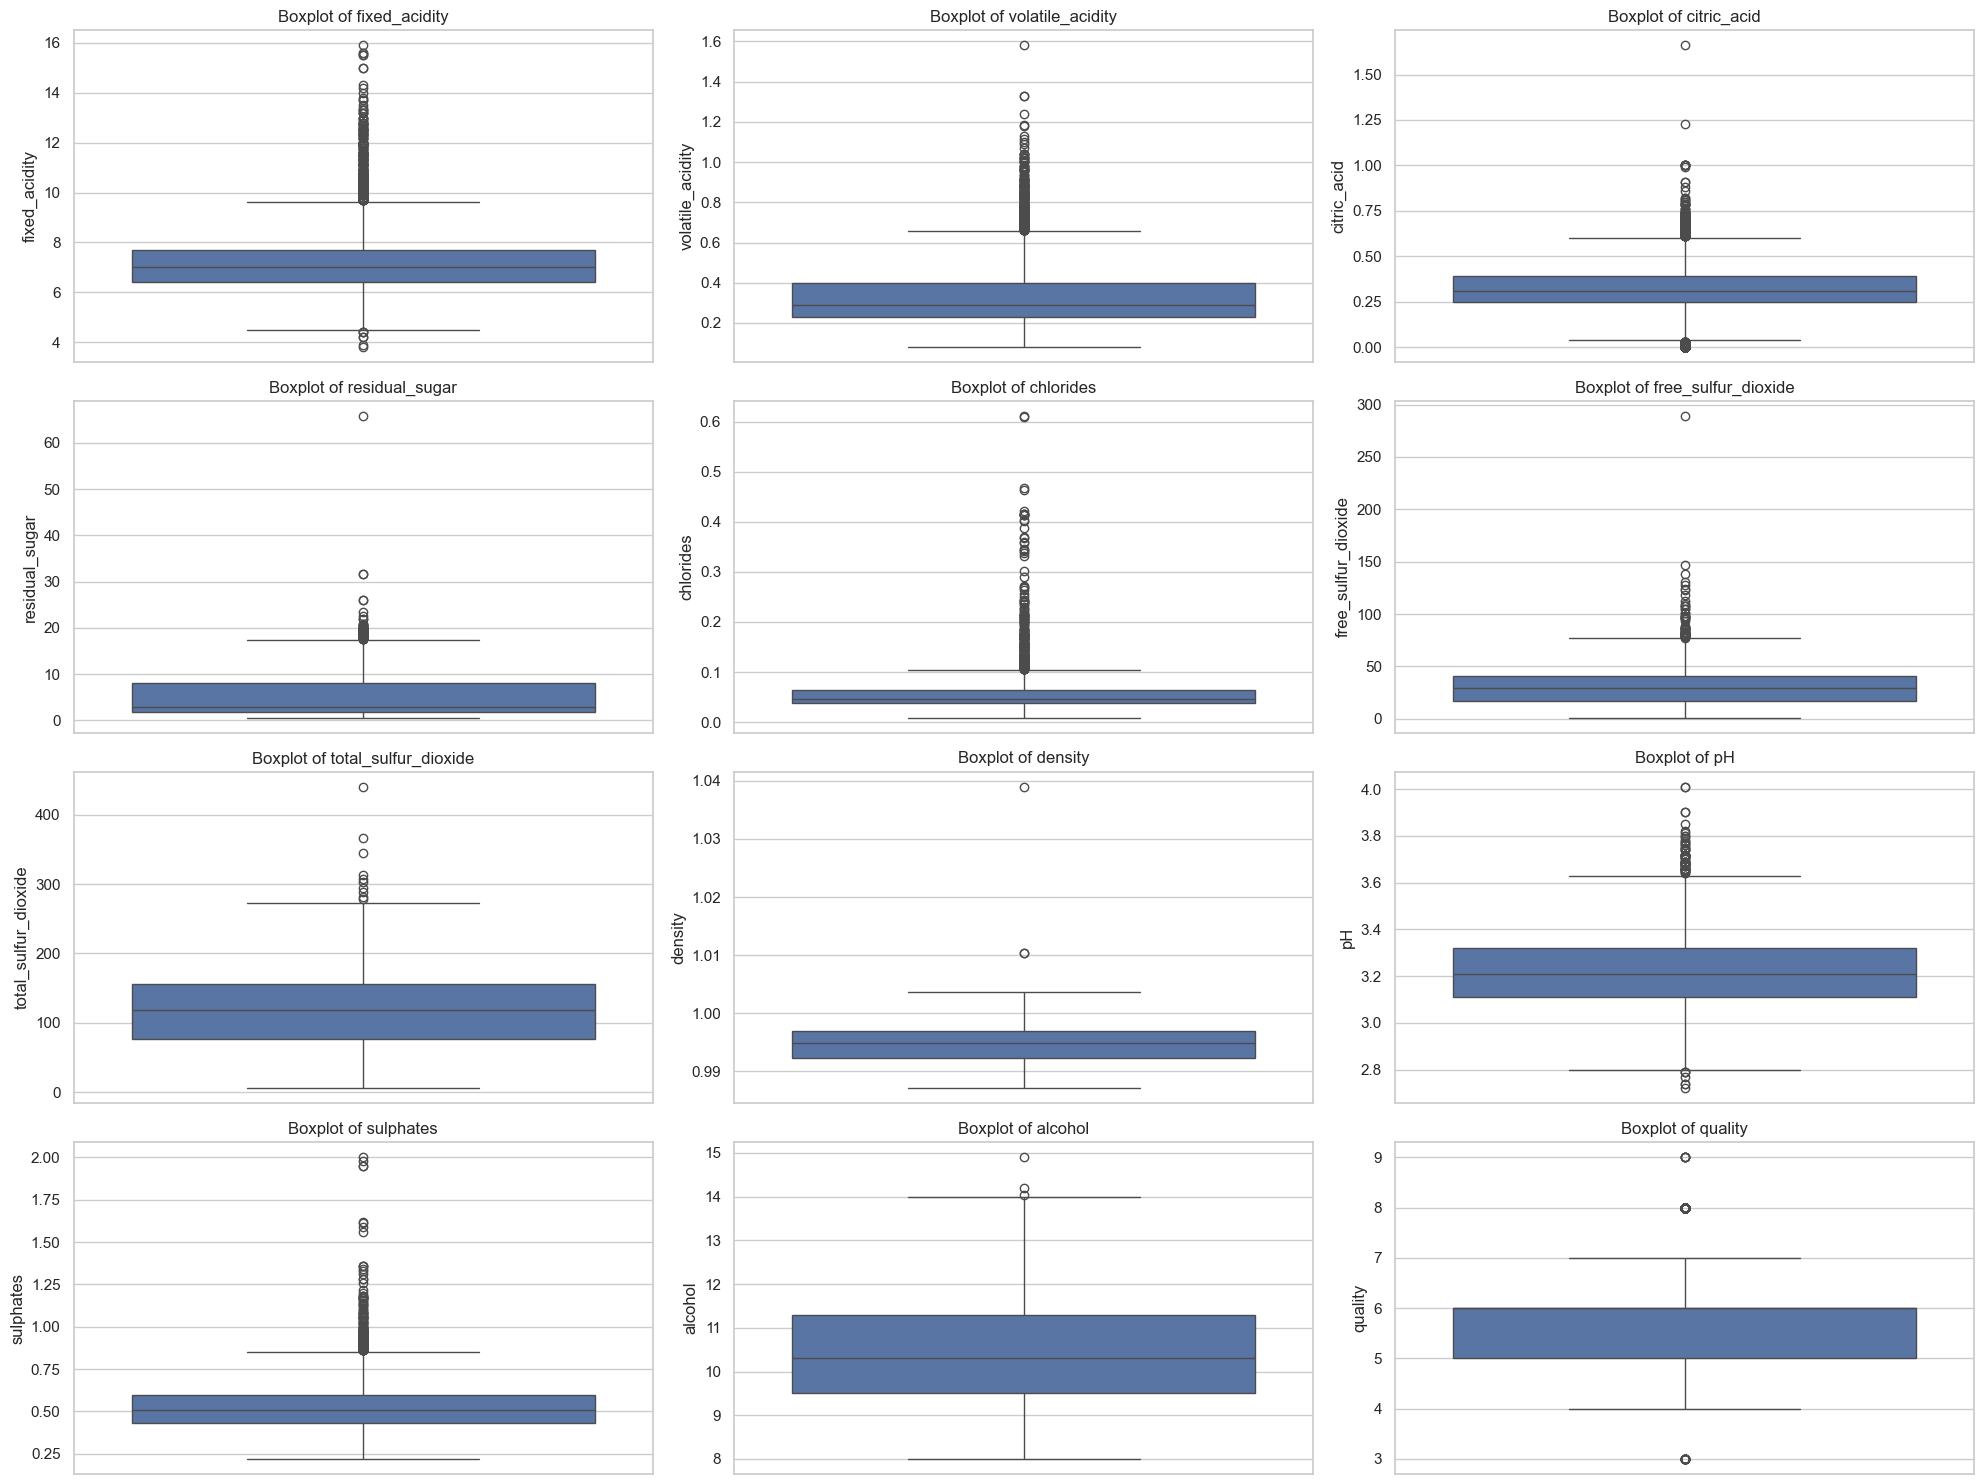

In [102]:
# Se visualizan los datos para identificar los valores atípicos.
plt.figure(figsize=(20, 15))
for i, column in enumerate(df_wine.columns[:-1][:12], 1):
    plt.subplot(4, 3, i)
    sns.boxplot(data=df_wine, y=column)
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

In [155]:
# Itera sobre cada columna (excepto la última)
for column in df_wine.columns[:-1][:12]:
    
    # Calcula el rango intercuartílico (IQR)
    Q1 = df_wine[column].quantile(0.25)
    Q3 = df_wine[column].quantile(0.75)
    IQR = Q3 - Q1

    # Identifica los valores atípicos
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df_wine[(df_wine[column] < lower_bound) | (df_wine[column] > upper_bound)]

    # Elimina los valores atípicos de la columna
    df_wine = df_wine[(df_wine[column] >= lower_bound) & (df_wine[column] <= upper_bound)]

    print(f"Valores atípicos eliminados en la columna '{column}': {len(outliers)}")

Valores atípicos eliminados en la columna 'fixed_acidity': 357
Valores atípicos eliminados en la columna 'volatile_acidity': 374
Valores atípicos eliminados en la columna 'citric_acid': 478
Valores atípicos eliminados en la columna 'residual_sugar': 37
Valores atípicos eliminados en la columna 'chlorides': 393
Valores atípicos eliminados en la columna 'free_sulfur_dioxide': 54
Valores atípicos eliminados en la columna 'total_sulfur_dioxide': 7
Valores atípicos eliminados en la columna 'density': 0
Valores atípicos eliminados en la columna 'pH': 60
Valores atípicos eliminados en la columna 'sulphates': 141
Valores atípicos eliminados en la columna 'alcohol': 0
Valores atípicos eliminados en la columna 'quality': 178


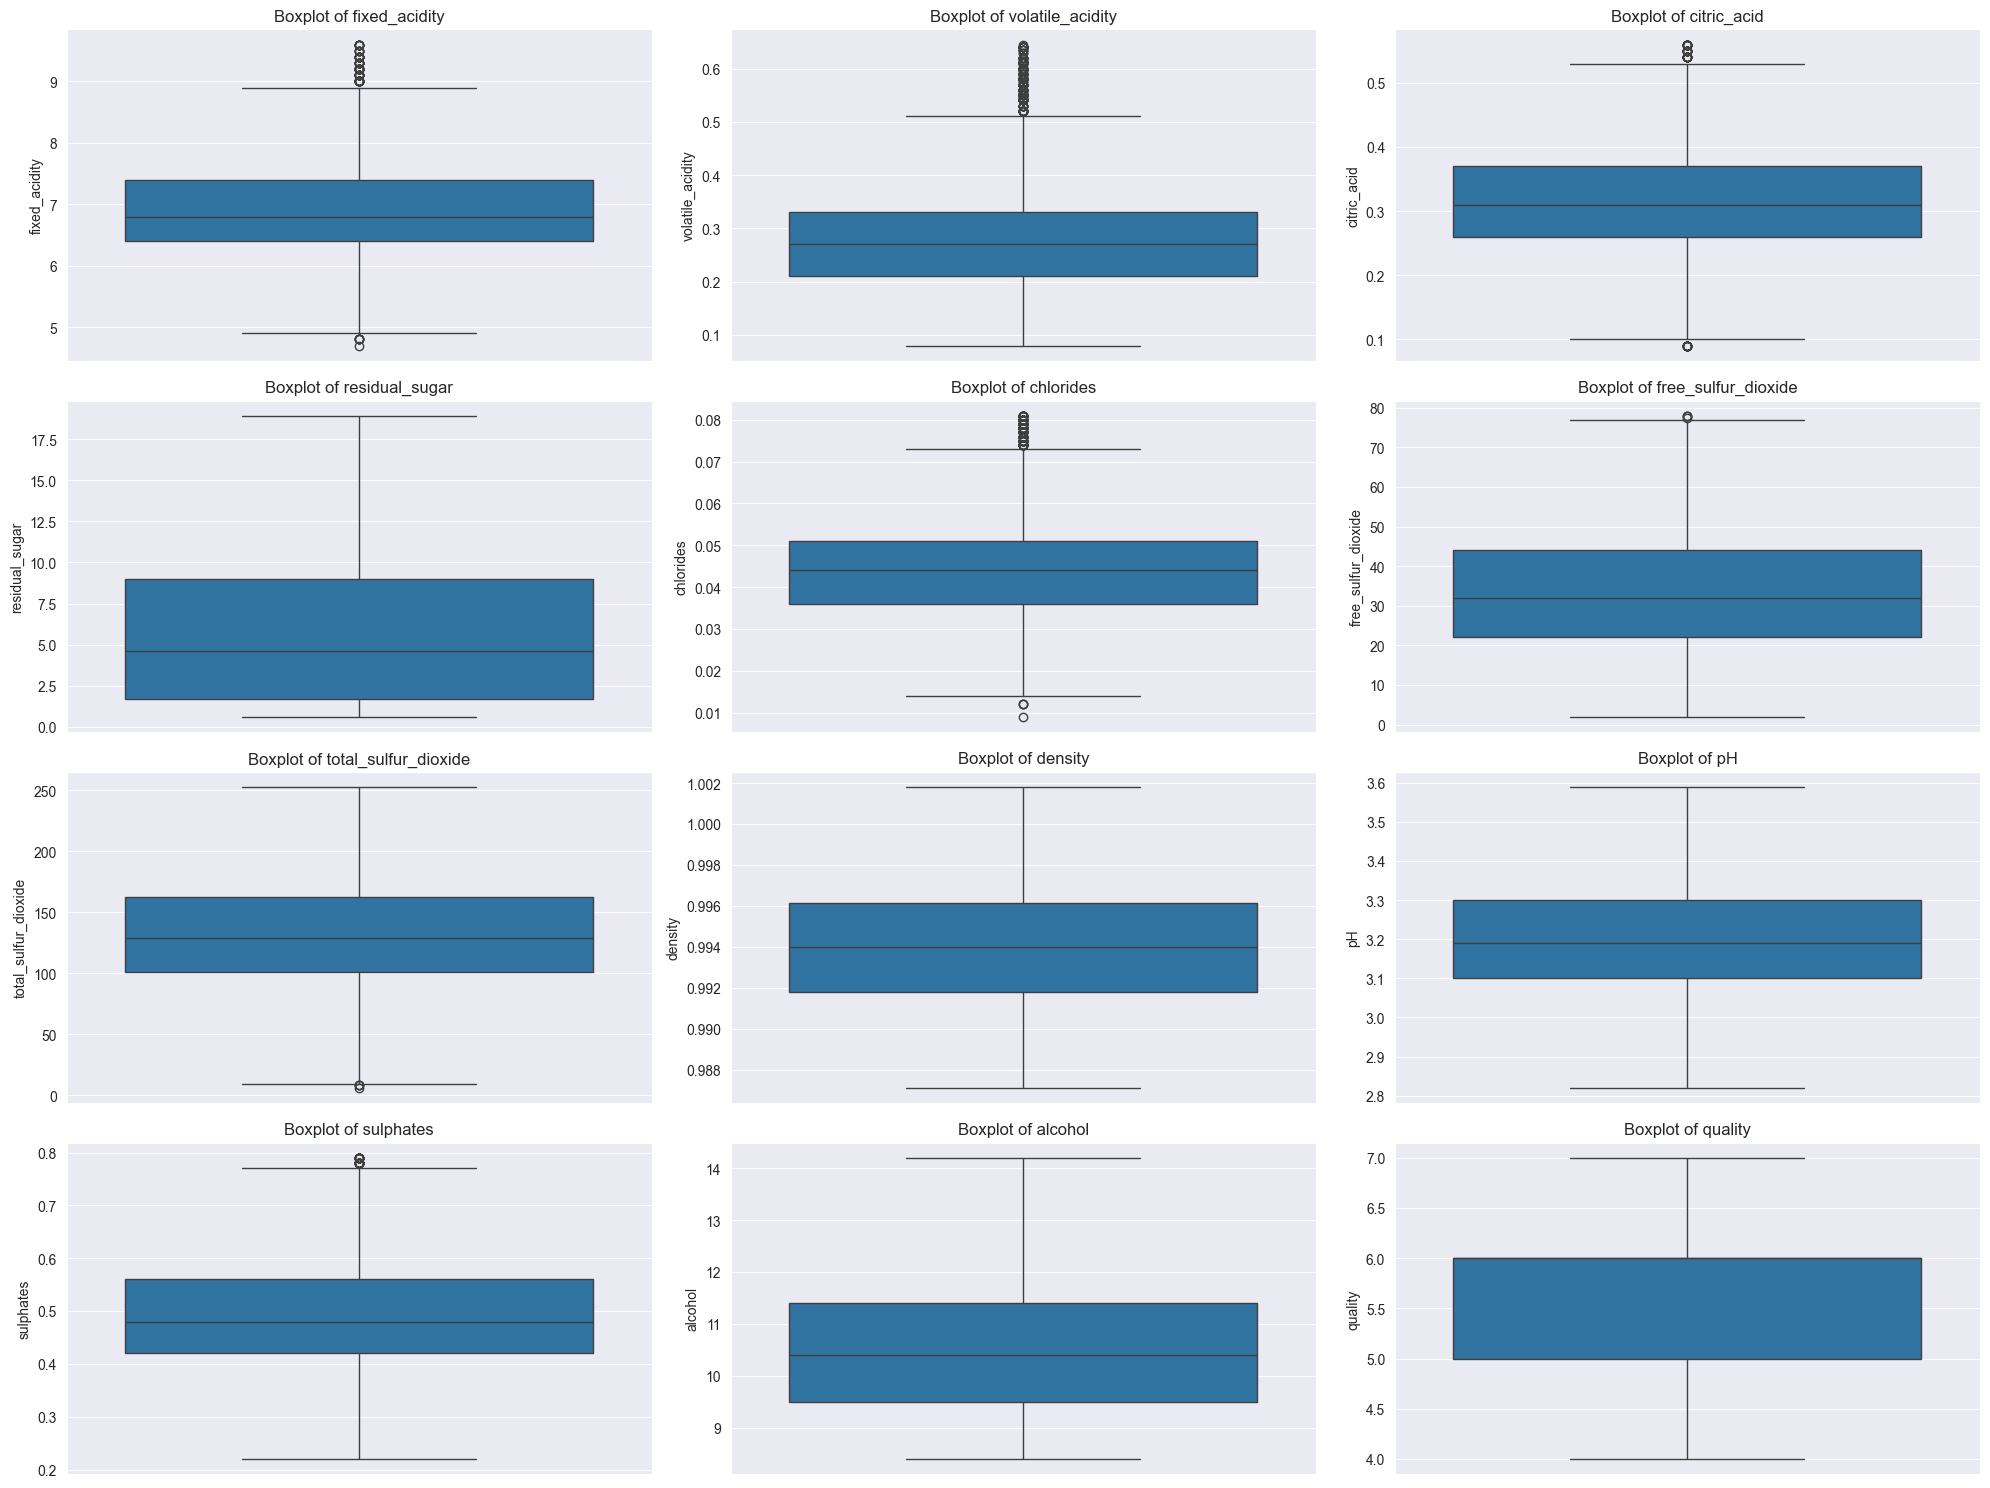

In [151]:
# Se visualizan los datos después de eliminar los valores atípicos.
plt.figure(figsize=(20, 15))
for i, column in enumerate(df_wine.columns[:-1][:12], 1):
    plt.subplot(4, 3, i)
    sns.boxplot(data=df_wine, y=column)
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

## Normalización de los Datos

In [156]:
# Normalización de las características
features = df_wine.drop('quality', axis=1)
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Crear un nuevo DataFrame con las características normalizadas
df_scaled = pd.DataFrame(features_scaled, columns=features.columns)
df_scaled['quality'] = df_wine['quality']

# Paso 4: Construcción del dataset

### Separación de variables dependientes e independientes

In [158]:
from keras.src.utils import to_categorical

y_data = df_wine['quality']
y_data = to_categorical(y_data)
X_data = df_wine.drop(columns=['quality'])

#  Dividir los datos en conjuntos de entrenamiento y pruebas (50% - 50%):
X_data_train1, X_data_test1, y_data_train1, y_data_test1 = train_test_split(X_data, y_data, test_size=0.5, random_state=2)
print(f'Proporción de entrenamiento 50%: {len(X_data_train1)} en entrenamiento - Proporción de prueba 50%: {len(X_data_test1)} muestras en prueba')


#  Dividir los datos en conjuntos de entrenamiento y pruebas (60% - 40%):
X_data_train2, X_data_test2, y_data_train2, y_data_test2 = train_test_split(X_data, y_data, test_size=0.4, random_state=2)
print(f'Proporción de entrenamiento 60%: {len(X_data_train2)} en entrenamiento - Proporción de prueba 40%: {len(X_data_test2)} muestras en prueba')


#  Dividir los datos en conjuntos de entrenamiento y pruebas (80% - 20%):
X_data_train3, X_data_test3, y_data_train3, y_data_test3 = train_test_split(X_data, y_data, test_size=0.2, random_state=2)
print(f'Proporción de entrenamiento 80%: {len(X_data_train3)} en entrenamiento - Proporción de prueba 20%: {len(X_data_test3)} muestras en prueba')

sc1 = StandardScaler()
sc2 = StandardScaler()
sc3 = StandardScaler()

# Estandarizar los datos
x_data_train1_scaled = sc1.fit_transform(X_data_train1)
x_data_test1_scaled = sc1.transform(X_data_test1)

x_data_train2_scaled = sc2.fit_transform(X_data_train2)
x_data_test2_scaled = sc2.transform(X_data_test2)

x_data_train3_scaled = sc3.fit_transform(X_data_train3)
x_data_test3_scaled = sc3.transform(X_data_test3)

Proporción de entrenamiento 50%: 2209 en entrenamiento - Proporción de prueba 50%: 2209 muestras en prueba
Proporción de entrenamiento 60%: 2650 en entrenamiento - Proporción de prueba 40%: 1768 muestras en prueba
Proporción de entrenamiento 80%: 3534 en entrenamiento - Proporción de prueba 20%: 884 muestras en prueba


In [159]:
X_data_train1

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,color_red,color_white
2110,7.8,0.34,0.35,1.8,0.042,8.0,167.0,0.99080,3.11,0.41,12.1,False,True
5512,7.2,0.25,0.32,1.5,0.054,24.0,105.0,0.99154,3.17,0.48,11.1,False,True
4328,6.5,0.29,0.31,1.7,0.035,24.0,79.0,0.99053,3.27,0.69,11.4,False,True
3940,7.2,0.34,0.30,8.4,0.051,40.0,167.0,0.99756,3.48,0.62,9.7,False,True
3344,6.1,0.34,0.31,12.0,0.053,46.0,238.0,0.99770,3.16,0.48,8.6,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5239,6.8,0.19,0.33,4.9,0.047,42.0,130.0,0.99283,3.12,0.56,11.0,False,True
2546,8.5,0.16,0.35,1.6,0.039,24.0,147.0,0.99350,2.96,0.36,10.0,False,True
4277,7.1,0.31,0.17,1.0,0.042,21.0,144.0,0.99304,3.13,0.40,9.6,False,True
5563,7.5,0.35,0.48,12.4,0.056,61.0,176.5,0.99803,2.97,0.52,8.8,False,True


# **Paso 5: Elaboración del modelo**

## **Construcción del modelo**

### Modelo 1: Perceptrón

In [160]:
from keras.src.layers import Dense
from keras import Sequential

def build_model_1():
    model = Sequential([
    Dense(units=y_data.shape[1], activation='elu')    
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', tf.keras.metrics.Recall(),tf.keras.metrics.Precision(), tf.keras.metrics.F1Score()])
    return model

    

### Modelo 2: Red neuronal con una capa oculta con un numero de neuronas igual al numero de entradas

In [161]:
y_data_train1.shape[1]

8

In [162]:
def build_model_2():
    model = tf.keras.models.Sequential()
    n_neurons = df_wine.shape[1] - 1
    model.add(tf.keras.layers.Dense(units=n_neurons, activation='sigmoid', use_bias=True))
    model.add(tf.keras.layers.Dense(units=y_data.shape[1], activation='sigmoid', use_bias=True))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', tf.keras.metrics.Recall(),tf.keras.metrics.Precision(), tf.keras.metrics.F1Score()])
    return model

### Modelo 3: Red neuronal con dos capas oculta con dos neuronas en cada capa oculta.

In [163]:
def build_model_3():
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(units=2, activation='sigmoid', use_bias=True))
    model.add(tf.keras.layers.Dense(units=2, activation='sigmoid', use_bias=True))
    model.add(tf.keras.layers.Dense(units=y_data.shape[1], activation='sigmoid', use_bias=True))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', tf.keras.metrics.Recall(),tf.keras.metrics.Precision(), tf.keras.metrics.F1Score()])
    return model

## **Entrenamiento de los modelos**

### Modelo 1

In [164]:
model_1_1 = build_model_1()
history_1_1 = model_1_1.fit(x_data_train1_scaled, y_data_train1, epochs=100, batch_size=32, validation_data=(x_data_test1_scaled, y_data_test1))

Epoch 1/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.1671 - f1_score: 0.0692 - loss: 8.3060 - precision_21: 0.1356 - recall_21: 0.3511 - val_accuracy: 0.1630 - val_f1_score: 0.0685 - val_loss: 8.3500 - val_precision_21: 0.1442 - val_recall_21: 0.3676
Epoch 2/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1535 - f1_score: 0.0647 - loss: 8.3489 - precision_21: 0.1390 - recall_21: 0.3479 - val_accuracy: 0.1684 - val_f1_score: 0.0717 - val_loss: 8.1305 - val_precision_21: 0.1465 - val_recall_21: 0.3699
Epoch 3/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1827 - f1_score: 0.0806 - loss: 7.7570 - precision_21: 0.1497 - recall_21: 0.3676 - val_accuracy: 0.1797 - val_f1_score: 0.0771 - val_loss: 7.9077 - val_precision_21: 0.1515 - val_recall_21: 0.3794
Epoch 4/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1874 - f1_score: 0.0839 - loss: 7.8567 - precision_21: 0.1538 - recall_21: 0.3822 - val_accuracy: 0.1924 - val_f1_score: 0.0816 - val_loss: 8.0584

In [165]:
model_1_2 = build_model_1()
history_1_2 = model_1_2.fit(x_data_train2_scaled, y_data_train2, epochs=100, batch_size=32, validation_data=(x_data_test2_scaled, y_data_test2))

Epoch 1/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.1873 - f1_score: 0.1022 - loss: 5.6877 - precision_22: 0.1386 - recall_22: 0.3145 - val_accuracy: 0.2161 - val_f1_score: 0.1107 - val_loss: 6.2277 - val_precision_22: 0.1560 - val_recall_22: 0.3484
Epoch 2/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1923 - f1_score: 0.1057 - loss: 6.9029 - precision_22: 0.1456 - recall_22: 0.3140 - val_accuracy: 0.2313 - val_f1_score: 0.1181 - val_loss: 7.1549 - val_precision_22: 0.1653 - val_recall_22: 0.3597
Epoch 3/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1977 - f1_score: 0.1089 - loss: 7.3613 - precision_22: 0.1598 - recall_22: 0.3464 - val_accuracy: 0.2308 - val_f1_score: 0.1180 - val_loss: 7.6041 - val_precision_22: 0.1746 - val_recall_22: 0.3626
Epoch 4/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2046 - f1_score: 0.1097 - loss: 7.4765 - precision_22: 0.1602 - recall_22: 0.3330 - val_accuracy: 0.2279 - val_f1_score: 0.1143 - val_loss: 7.7457

In [166]:
model_1_3 = build_model_1()
history_1_3 = model_1_3.fit(x_data_train3_scaled, y_data_train3, epochs=100, batch_size=32, validation_data=(x_data_test3_scaled, y_data_test3))

Epoch 1/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1937 - f1_score: 0.1015 - loss: 6.7994 - precision_23: 0.1554 - recall_23: 0.3070 - val_accuracy: 0.1663 - val_f1_score: 0.0901 - val_loss: 7.4048 - val_precision_23: 0.1514 - val_recall_23: 0.2975
Epoch 2/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1896 - f1_score: 0.0968 - loss: 7.7870 - precision_23: 0.1593 - recall_23: 0.3015 - val_accuracy: 0.1618 - val_f1_score: 0.0913 - val_loss: 8.1463 - val_precision_23: 0.1374 - val_recall_23: 0.2828
Epoch 3/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1795 - f1_score: 0.0921 - loss: 8.4941 - precision_23: 0.1495 - recall_23: 0.3004 - val_accuracy: 0.1697 - val_f1_score: 0.0949 - val_loss: 8.5373 - val_precision_23: 0.1478 - val_recall_23: 0.3020
Epoch 4/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1923 - f1_score: 0.1028 - loss: 8.6674 - precision_23: 0.1487 - recall_23: 0.3005 - val_accuracy: 0.1776 - val_f1_score: 0.0997 - val_loss

### Modelo 2

In [167]:
model_2_1 = build_model_2()
history_2_1 = model_2_1.fit(x_data_train1_scaled, y_data_train1, epochs=100, batch_size=32, validation_data=(x_data_test1_scaled, y_data_test1))

Epoch 1/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.0688 - f1_score: 0.0438 - loss: 2.2260 - precision_24: 0.0948 - recall_24: 0.4042 - val_accuracy: 0.3119 - val_f1_score: 0.1265 - val_loss: 1.8060 - val_precision_24: 0.2219 - val_recall_24: 0.9344
Epoch 2/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3467 - f1_score: 0.1263 - loss: 1.7170 - precision_24: 0.2548 - recall_24: 0.9390 - val_accuracy: 0.4323 - val_f1_score: 0.1390 - val_loss: 1.4848 - val_precision_24: 0.3205 - val_recall_24: 0.9733
Epoch 3/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4528 - f1_score: 0.1346 - loss: 1.4426 - precision_24: 0.3227 - recall_24: 0.9700 - val_accuracy: 0.4762 - val_f1_score: 0.1343 - val_loss: 1.3142 - val_precision_24: 0.3293 - val_recall_24: 0.9715
Epoch 4/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4869 - f1_score: 0.1352 - loss: 1.2830 - precision_24: 0.3271 - recall_24: 0.9668 - val_accuracy: 0.4821 - val_f1_score: 0.1311 - val_loss: 1.2202

In [168]:
model_2_2 = build_model_2()
history_2_2 = model_2_2.fit(x_data_train2_scaled, y_data_train2, epochs=100, batch_size=32, validation_data=(x_data_test2_scaled, y_data_test2))

Epoch 1/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1648 - f1_score: 0.0634 - loss: 1.9918 - precision_25: 0.1723 - recall_25: 0.5047 - val_accuracy: 0.4729 - val_f1_score: 0.1086 - val_loss: 1.5635 - val_precision_25: 0.3411 - val_recall_25: 0.8592
Epoch 2/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4599 - f1_score: 0.1033 - loss: 1.4896 - precision_25: 0.3452 - recall_25: 0.9035 - val_accuracy: 0.4921 - val_f1_score: 0.1039 - val_loss: 1.2966 - val_precision_25: 0.3405 - val_recall_25: 0.9468
Epoch 3/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4935 - f1_score: 0.0991 - loss: 1.2709 - precision_25: 0.3375 - recall_25: 0.9468 - val_accuracy: 0.4960 - val_f1_score: 0.1117 - val_loss: 1.1809 - val_precision_25: 0.3355 - val_recall_25: 0.9598
Epoch 4/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4982 - f1_score: 0.1155 - loss: 1.1728 - precision_25: 0.3331 - recall_25: 0.9608 - val_accuracy: 0.5028 - val_f1_score: 0.1196 - val_loss: 1.1196

In [169]:
model_2_3 = build_model_2()
history_2_3 = model_2_3.fit(x_data_train3_scaled, y_data_train3, epochs=100, batch_size=32, validation_data=(x_data_test3_scaled, y_data_test3))

Epoch 1/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2412 - f1_score: 0.0626 - loss: 2.0809 - precision_26: 0.1616 - recall_26: 0.6838 - val_accuracy: 0.4819 - val_f1_score: 0.0813 - val_loss: 1.5777 - val_precision_26: 0.2668 - val_recall_26: 0.6742
Epoch 2/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4792 - f1_score: 0.0810 - loss: 1.4885 - precision_26: 0.3109 - recall_26: 0.7477 - val_accuracy: 0.4819 - val_f1_score: 0.0813 - val_loss: 1.2938 - val_precision_26: 0.3396 - val_recall_26: 0.9649
Epoch 3/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4894 - f1_score: 0.0867 - loss: 1.2524 - precision_26: 0.3317 - recall_26: 0.9673 - val_accuracy: 0.5011 - val_f1_score: 0.1040 - val_loss: 1.1596 - val_precision_26: 0.3248 - val_recall_26: 0.9740
Epoch 4/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4889 - f1_score: 0.1097 - loss: 1.1687 - precision_26: 0.3229 - recall_26: 0.9684 - val_accuracy: 0.5023 - val_f1_score: 0.1206 - val_loss

### Modelo 3

In [170]:
model_3_1 = build_model_3()
history_3_1 = model_3_1.fit(x_data_train1_scaled, y_data_train1, epochs=100, batch_size=32, validation_data=(x_data_test1_scaled, y_data_test1))

Epoch 1/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.0869 - f1_score: 0.0256 - loss: 2.0147 - precision_27: 0.1596 - recall_27: 0.5113 - val_accuracy: 0.4731 - val_f1_score: 0.0803 - val_loss: 1.8885 - val_precision_27: 0.1701 - val_recall_27: 0.6804
Epoch 2/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4794 - f1_score: 0.0810 - loss: 1.8548 - precision_27: 0.1861 - recall_27: 0.6806 - val_accuracy: 0.4731 - val_f1_score: 0.0803 - val_loss: 1.7508 - val_precision_27: 0.3244 - val_recall_27: 0.9733
Epoch 3/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4783 - f1_score: 0.0809 - loss: 1.7235 - precision_27: 0.3229 - recall_27: 0.9686 - val_accuracy: 0.4731 - val_f1_score: 0.0803 - val_loss: 1.6359 - val_precision_27: 0.3244 - val_recall_27: 0.9733
Epoch 4/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4759 - f1_score: 0.0806 - loss: 1.6106 - precision_27: 0.3245 - recall_27: 0.9736 - val_accuracy: 0.4731 - val_f1_score: 0.0803 - val_loss: 1.5398

In [171]:
model_3_2 = build_model_3()
history_3_2 = model_3_2.fit(x_data_train2_scaled, y_data_train2, epochs=100, batch_size=32, validation_data=(x_data_test2_scaled, y_data_test2))

Epoch 1/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.3148 - f1_score: 0.0598 - loss: 1.7748 - precision_28: 0.3231 - recall_28: 0.9742 - val_accuracy: 0.2941 - val_f1_score: 0.0568 - val_loss: 1.6633 - val_precision_28: 0.3254 - val_recall_28: 0.9762
Epoch 2/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3125 - f1_score: 0.0595 - loss: 1.6288 - precision_28: 0.3216 - recall_28: 0.9647 - val_accuracy: 0.2941 - val_f1_score: 0.0568 - val_loss: 1.5337 - val_precision_28: 0.3254 - val_recall_28: 0.9762
Epoch 3/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2932 - f1_score: 0.0574 - loss: 1.5092 - precision_28: 0.3238 - recall_28: 0.9714 - val_accuracy: 0.2794 - val_f1_score: 0.0661 - val_loss: 1.4319 - val_precision_28: 0.3254 - val_recall_28: 0.9762
Epoch 4/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3329 - f1_score: 0.0871 - loss: 1.4076 - precision_28: 0.3238 - recall_28: 0.9713 - val_accuracy: 0.4745 - val_f1_score: 0.0805 - val_loss: 1.3551

In [172]:
model_3_3 = build_model_3()
history_3_3 = model_3_3.fit(x_data_train3_scaled, y_data_train3, epochs=100, batch_size=32, validation_data=(x_data_test3_scaled, y_data_test3))

Epoch 1/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1962 - f1_score: 0.0484 - loss: 2.0338 - precision_29: 0.1591 - recall_29: 0.4683 - val_accuracy: 0.4819 - val_f1_score: 0.0813 - val_loss: 1.8686 - val_precision_29: 0.3247 - val_recall_29: 0.5396
Epoch 2/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4753 - f1_score: 0.0805 - loss: 1.8269 - precision_29: 0.3482 - recall_29: 0.5963 - val_accuracy: 0.4819 - val_f1_score: 0.0813 - val_loss: 1.6931 - val_precision_29: 0.3411 - val_recall_29: 0.7330
Epoch 3/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4721 - f1_score: 0.0802 - loss: 1.6578 - precision_29: 0.3374 - recall_29: 0.8837 - val_accuracy: 0.4819 - val_f1_score: 0.0813 - val_loss: 1.5527 - val_precision_29: 0.3247 - val_recall_29: 0.9740
Epoch 4/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4708 - f1_score: 0.0800 - loss: 1.5324 - precision_29: 0.3239 - recall_29: 0.9716 - val_accuracy: 0.4819 - val_f1_score: 0.0813 - val_loss

## **Evaluación de los modelos**

### Análisis de rendimiento para las diferentes proporciones de entrenamiento

In [179]:
import numpy as np
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# Función para graficar las métricas de entrenamiento:
def plot_metrics_comparison(history_1, history_2, history_3):

    # Definir los tamaños de entrenamiento
    train_sizes = [0.5, 0.6, 0.8]

    # Definir las métricas que queremos graficar  metrics_names = ['accuracy', 'recall', 'precision', 'f1_score']
    metrics_names = ['accuracy', 'f1_score']

    # Crear listas vacías para almacenar los valores de las métricas finales
    final_metrics = {metric_name: [] for metric_name in metrics_names}

    # Iterar sobre los modelos entrenados
    for history, train_size in zip([history_1, history_2, history_3], train_sizes):
        # Guardar el valor promedio de las métricas para este modelo
        metrics_model = {}
        for metric_name in metrics_names:
            try:
                if metric_name == 'accuracy':
                    # Guardar solo el último valor de accuracy
                    metrics_model[metric_name] = history.history[metric_name][-1]
                    
                if metric_name == 'f1_score':
                    # Guardar solo el último valor de f1_score
                    metrics_model[metric_name] = history.history[metric_name][-1]
                    
                else:
                    # Guardar el valor promedio de las métricas
                    metrics_model[metric_name] = np.mean(history.history[metric_name])
            except KeyError:
                print(f"La métrica {metric_name} no está disponible en el historial del modelo con tamaño de entrenamiento {train_size}")
        # Agregar las métricas de este modelo a las listas finales
        for metric_name in metrics_names:
            final_metrics[metric_name].append(metrics_model[metric_name])

    # Graficar métricas
    plt.figure(figsize=(12, 8))
    for metric_name in metrics_names:
        plt.plot(train_sizes, final_metrics[metric_name], marker='o', label=metric_name)
    plt.title('Performance Comparison of Different Train Sizes')
    plt.xlabel('Train Size')
    plt.ylabel('Performance Metric Value')
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.show()


### Rendimiento de proporciones del modelo #1 (Perceptrón)

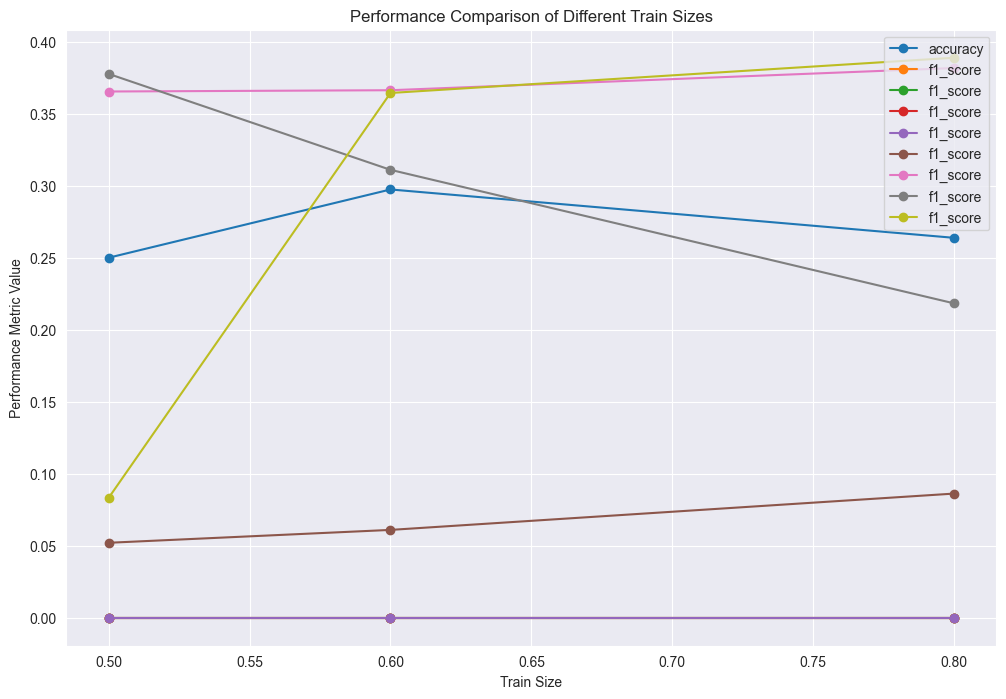

In [180]:
plot_metrics_comparison(history_1_1, history_1_2, history_1_3)

### Rendimiento de proporciones del modelo #2 (Red neuronal con una capa oculta)

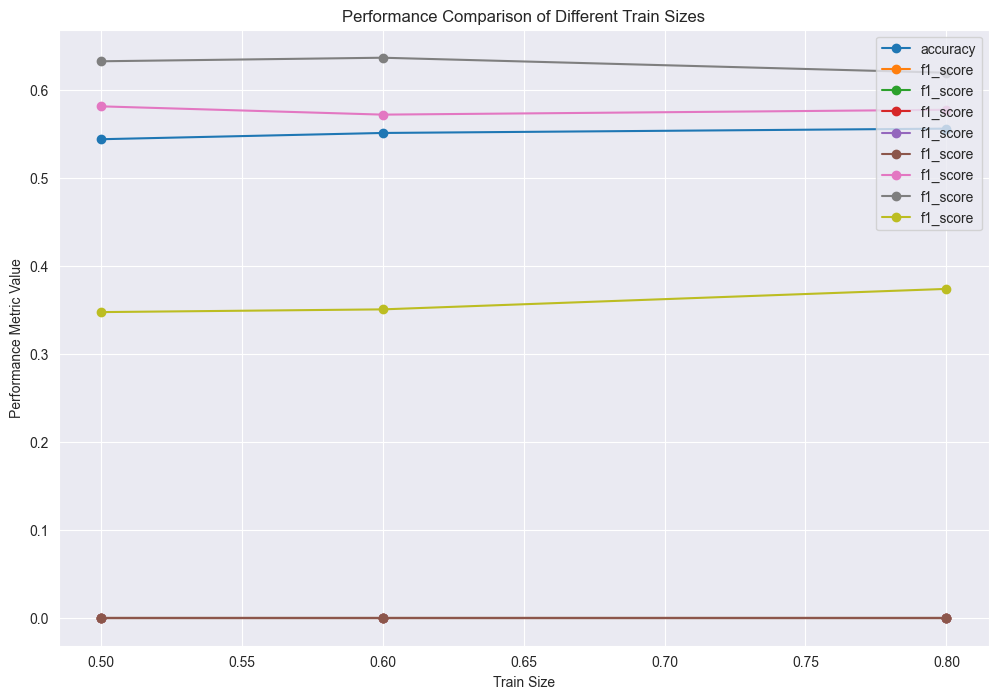

In [181]:
plot_metrics_comparison(history_2_1, history_2_2, history_2_3)

### Rendimiento de proporciones del modelo #3 (Red neuronal con dos capas ocultas)

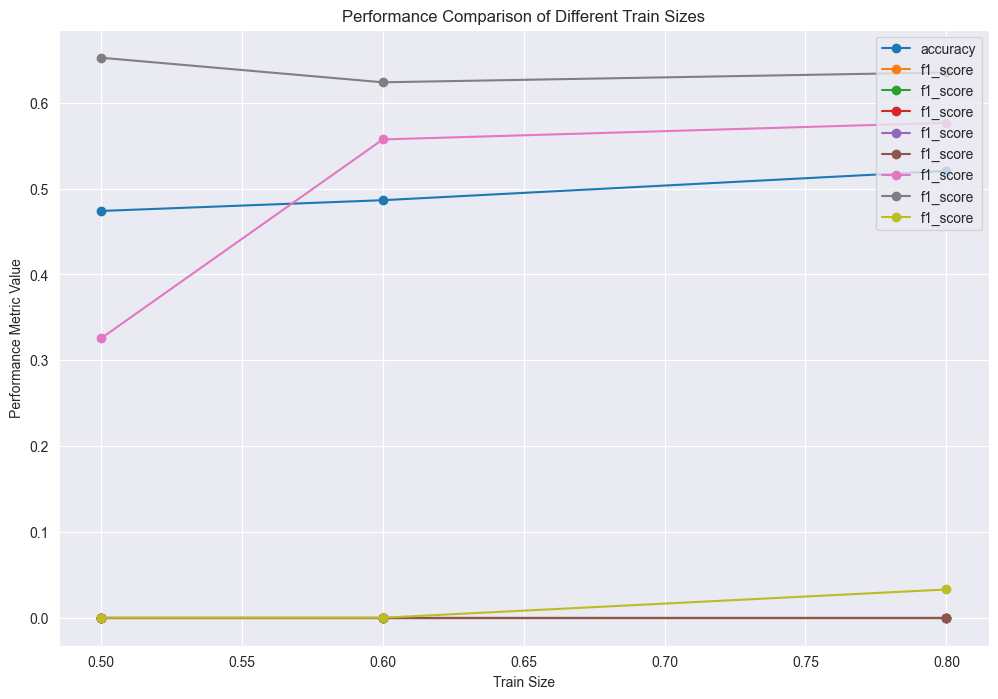

In [182]:
plot_metrics_comparison(history_3_1, history_3_2, history_3_3)

### Mostrar la matriz de confusión para cada modelo

In [183]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Función para calcular métricas y mostrar la matriz de confusión
def medir_rendimiento_del_modelo(model, X_test, y_test):
    # Obtener las predicciones del modelo
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true = np.argmax(y_test, axis=1)

    # Calcular la matriz de confusión
    cm = confusion_matrix(y_true, y_pred_classes)
    print("Matriz de Confusión:")
    print(cm)

    # Calcular las métricas de evaluación
    accuracy = accuracy_score(y_true, y_pred_classes)
    precision = precision_score(y_true, y_pred_classes, average='macro')
    recall = recall_score(y_true, y_pred_classes, average='macro', zero_division=0)  # Controla el comportamiento con zero_division
    f1 = f1_score(y_true, y_pred_classes, average='macro')

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

### Matriz de confusión del modelo #1 (Perceptrón)


In [184]:
medir_rendimiento_del_modelo(model_1_1, x_data_test1_scaled, y_data_test1)

70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 741us/step
Matriz de Confusión:
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  1   0   0   5   8   9  33   3]
 [ 51   0   1  34  91 192 171 107]
 [ 43   1   1 102 171 238 350 139]
 [ 16   4   0 102  75  47 188  26]]
Accuracy: 0.2608
Precision: 0.1231
Recall: 0.1030
F1 Score: 0.1051


### Matriz de confusión del modelo #2 (Red neuronal con una capa oculta)

In [185]:
medir_rendimiento_del_modelo(model_1_2, x_data_test2_scaled, y_data_test2)

56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Matriz de Confusión:
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   1   7  13  16   5]
 [  4   1   9  53  54 190 146  63]
 [  1   0  21  33 120 205 222 237]
 [  2   0   4   0  31  54 102 174]]
Accuracy: 0.3354
Precision: 0.1580
Recall: 0.1588
F1 Score: 0.1486


### Matriz de confusión del modelo #3 (Red neuronal con dos capas ocultas)

In [186]:
medir_rendimiento_del_modelo(model_1_3, x_data_test3_scaled, y_data_test3)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Matriz de Confusión:
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   2   2   0   9   8   1   1]
 [ 17  48  11   8  39  89  44  10]
 [ 14  66  16  17  61 100  64  88]
 [  3   9  15   5   7  25  26  79]]
Accuracy: 0.2726
Precision: 0.1745
Recall: 0.1679
F1 Score: 0.1472
